In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Existing Data Analysis (**Ignore**)

In [18]:
from PIL import Image, ImageDraw, ImageFont
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

def create_df_unicode():
    with open('/content/drive/MyDrive/JYOTIKA/Colab Notebooks/Alphabet_complexity/data/unicode_names_list.txt','r') as f:
        unicode = f.read()
    unicode = unicode.split('\n')
    df_unicode = pd.DataFrame([u.split('\t')
            for u in unicode if len(u)>0 and u[0] not in '\t;@'],
                columns=['code','note'])
    df_unicode = df_unicode[df_unicode.note.apply(lambda x: x[0]!='<')].reset_index(drop=True)
    df_unicode.note.apply(lambda x: x.split()[0]).value_counts().index.tolist()
    df_unicode['rep'] = df_unicode.code.apply(u)
    return df_unicode

def u(i):
    try:
        return chr(int(i, 16))
    except:
        return i

def get_language(note):
    return note.split()[0]

def code_type(code):
    u = '0x'+code
    for a,b,c in [('0x1F600', '0x1F64F', 'Emoticons'),
                  ('0x1F300', '0x1F5FF', 'Misc Symbols and Pictographs'),
                  ('0x1F680', '0x1F6FF', 'Transport and Map'),
                  ('0x2600', '0x26FF', 'Misc symbols'),
                  ('0x2700', '0x27BF', 'Dingbats'),
                  ('0xFE00', '0xFE0F', 'Variation Selectors'),
                  ('0x1F900', '0x1F9FF', 'Supplemental Symbols and Pictographs'),
                  ('0x1F1E6', '0x1F1FF', 'Flags')]:
        if a<=u<=b:
            return c
    return 'Writing Symbol'

def make_picture(code,ttf):
    image = Image.new('RGB', (100,100))

    draw = ImageDraw.Draw(image)
    draw.text((50,50),
              u(code),
              font=ImageFont.truetype(ttf, 11))
    picture = np.mean(255-np.array(image),axis=-1)/255
    return picture

df_unicode = create_df_unicode()
dfu=df_unicode[df_unicode.code.apply(code_type)=='Writing Symbol'].reset_index(drop=True)
dfu['language'] = dfu.note.apply(get_language)
dfu['picture'] = dfu.code.apply(lambda x: make_picture(x,'/content/drive/MyDrive/JYOTIKA/Colab Notebooks/Alphabet_complexity/data/ttfs/unifont-15.0.06.ttf'))

Notice characters with unicode instead of their rep

In [4]:
' '.join(dfu[dfu.language=='DEVANAGARI'].rep)

'ऀ ँ ं ः ऄ अ आ इ ई उ ऊ ऋ ऌ ऍ ऎ ए ऐ ऑ ऒ ओ औ क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न ऩ प फ ब भ म य र ऱ ल ळ ऴ व श ष स ह ऺ ऻ ़ ऽ ा ि ी ु ू ृ ॄ ॅ ॆ े ै ॉ ॊ ो ौ ् ॎ ॏ ॐ ॑ ॒ ॓ ॔ ॕ ॖ ॗ क़ ख़ ग़ ज़ ड़ ढ़ फ़ य़ ॠ ॡ ॢ ॣ । ॥ ० १ २ ३ ४ ५ ६ ७ ८ ९ ॰ ॱ ॲ ॳ ॴ ॵ ॶ ॷ ॸ ॹ ॺ ॻ ॼ ॽ ॾ ॿ ꣲ ꣳ ꣴ ꣵ ꣶ ꣷ ꣸ ꣹ ꣺ ꣻ ꣼ ꣽ ꣾ ꣿ \U00011b00 \U00011b01 \U00011b02 \U00011b03 \U00011b04 \U00011b05 \U00011b06 \U00011b07 \U00011b08 \U00011b09'

In [30]:
dfu[dfu.language=='DEVANAGARI']

,code,note,rep,language,picture
2164,0900,DEVANAGARI SIGN INVERTED CANDRABINDU,ऀ,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2165,0901,DEVANAGARI SIGN CANDRABINDU,ँ,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2166,0902,DEVANAGARI SIGN ANUSVARA,ं,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2167,0903,DEVANAGARI SIGN VISARGA,ः,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
2168,0904,DEVANAGARI LETTER SHORT A,ऄ,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
...,...,...,...,...,...
20663,11B05,DEVANAGARI SIGN EXTENDED BHALE WITH HOOK,𑬅,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
20664,11B06,DEVANAGARI SIGN WESTERN FIVE-LIKE BHALE,𑬆,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
20665,11B07,DEVANAGARI SIGN WESTERN NINE-LIKE BHALE,𑬇,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
20666,11B08,DEVANAGARI SIGN REVERSED NINE-LIKE BHALE,𑬈,DEVANAGARI,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


In [31]:
print(dfu.rep[20663])
print(dfu.rep[20667])

𑬅
𑬉


In [32]:
print(dfu.rep[20663]==dfu.rep[20667])

False


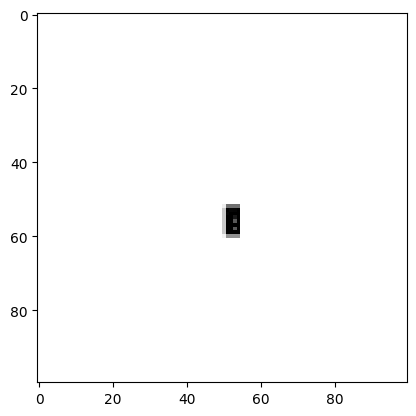

In [33]:
plt.imshow(dfu.iloc[20663].picture,cmap='gray')
plt.show()

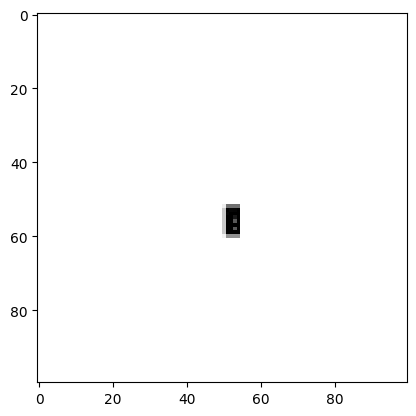

In [34]:
plt.imshow(dfu.iloc[20667].picture,cmap='gray')
plt.show()

In [35]:
dfu.picture[20663]==dfu.picture[20667]

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [36]:
incorrect_rep = []
for x in range(0,33046):
  if((dfu.picture[x]==dfu.picture[20667]).all()):
    incorrect_rep.append(x)

In [24]:
len(incorrect_rep)

15135

In [27]:
len(dfu)-len(incorrect_rep)

17911

# **FONT ANALYSIS**

In [26]:
fonts = {
    'NotoSans': "/content/drive/MyDrive/JYOTIKA/Colab Notebooks/Alphabet_complexity/data/ttfs/NotoSans-Regular.ttf",
    'GnuUnifont': "/content/drive/MyDrive/JYOTIKA/Colab Notebooks/Alphabet_complexity/data/ttfs/unifont-15.0.06.ttf",
    'CourierNew': "/content/drive/MyDrive/JYOTIKA/Colab Notebooks/Alphabet_complexity/data/ttfs/courier_new.ttf",
    'Code2000': "/content/drive/MyDrive/JYOTIKA/Colab Notebooks/Alphabet_complexity/data/ttfs/CODE2000.ttf",
    'ArielUnicodeMS': "/content/drive/MyDrive/JYOTIKA/Colab Notebooks/Alphabet_complexity/data/ttfs/Arial Unicode MS Font.ttf"
}